In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [20]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('x_es')
    scalar.append('y_es')
    scalar.append('Q2_es')
    
    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    cols.append('jet_phi')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [21]:
def getData(inputFiles, isMC=False):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
        
    scalar.append('x_es')
    scalar.append('y_es')
    scalar.append('Q2_es')
    
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')

    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [8]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## get data and MC and apply cuts

In [ ]:
df = applyCuts(getData(['data_calibrated.root']))
dfraw     = applyCuts(getData(['data_notcalibrated.root']))
mc = applyCuts(getData(['djangoh.root'],isMC=True))
altmc = applyCuts(getData(['rapgap.root'],isMC=True))

In [23]:
mc.head()

,Q2,Q2_es,Weight,acoplanarity,e_theta,x_es,e_pt,vertex_z,ptmiss,e_p,e_phi,WeightGen,y,x,ptratio,y_es,Empz,e_eta,logQ2,logx
0,308.923553,308.923553,1.000000,175.606247,2.429109,0.011273,15.039418,7.566709,2.440001,23.006071,2.522718,1.000000,0.267832,0.011356,0.854048,0.269797,55.436275,-0.988544,2.489851,-1.944768
5,769.722717,769.722717,1.000000,174.876053,1.673625,0.010328,15.457251,1.110400,1.654459,15.539333,0.701711,1.000000,0.689594,0.010990,0.937012,0.733756,48.833092,-0.103011,2.886335,-1.959016
7,314.569122,314.569122,1.945175,177.782181,2.438012,0.014265,15.525362,13.042461,3.017151,23.997705,0.151090,1.945175,0.233756,0.013249,0.808806,0.217115,53.594379,-1.002234,2.497716,-1.877803
8,1342.502075,1342.502075,1.000000,169.953552,1.818888,0.048017,31.249514,-2.954275,5.588820,32.236504,1.113435,1.000000,0.272603,0.048487,1.024087,0.275274,55.529240,-0.250676,3.127915,-1.314373
9,4252.020020,4252.020020,1.000000,179.033234,1.269451,0.365088,56.722691,-14.496528,4.568794,59.399334,-1.813863,1.000000,0.243309,0.172060,1.078617,0.114668,46.203976,0.306012,3.628596,-0.764321


## plot electron variables (data and MC)

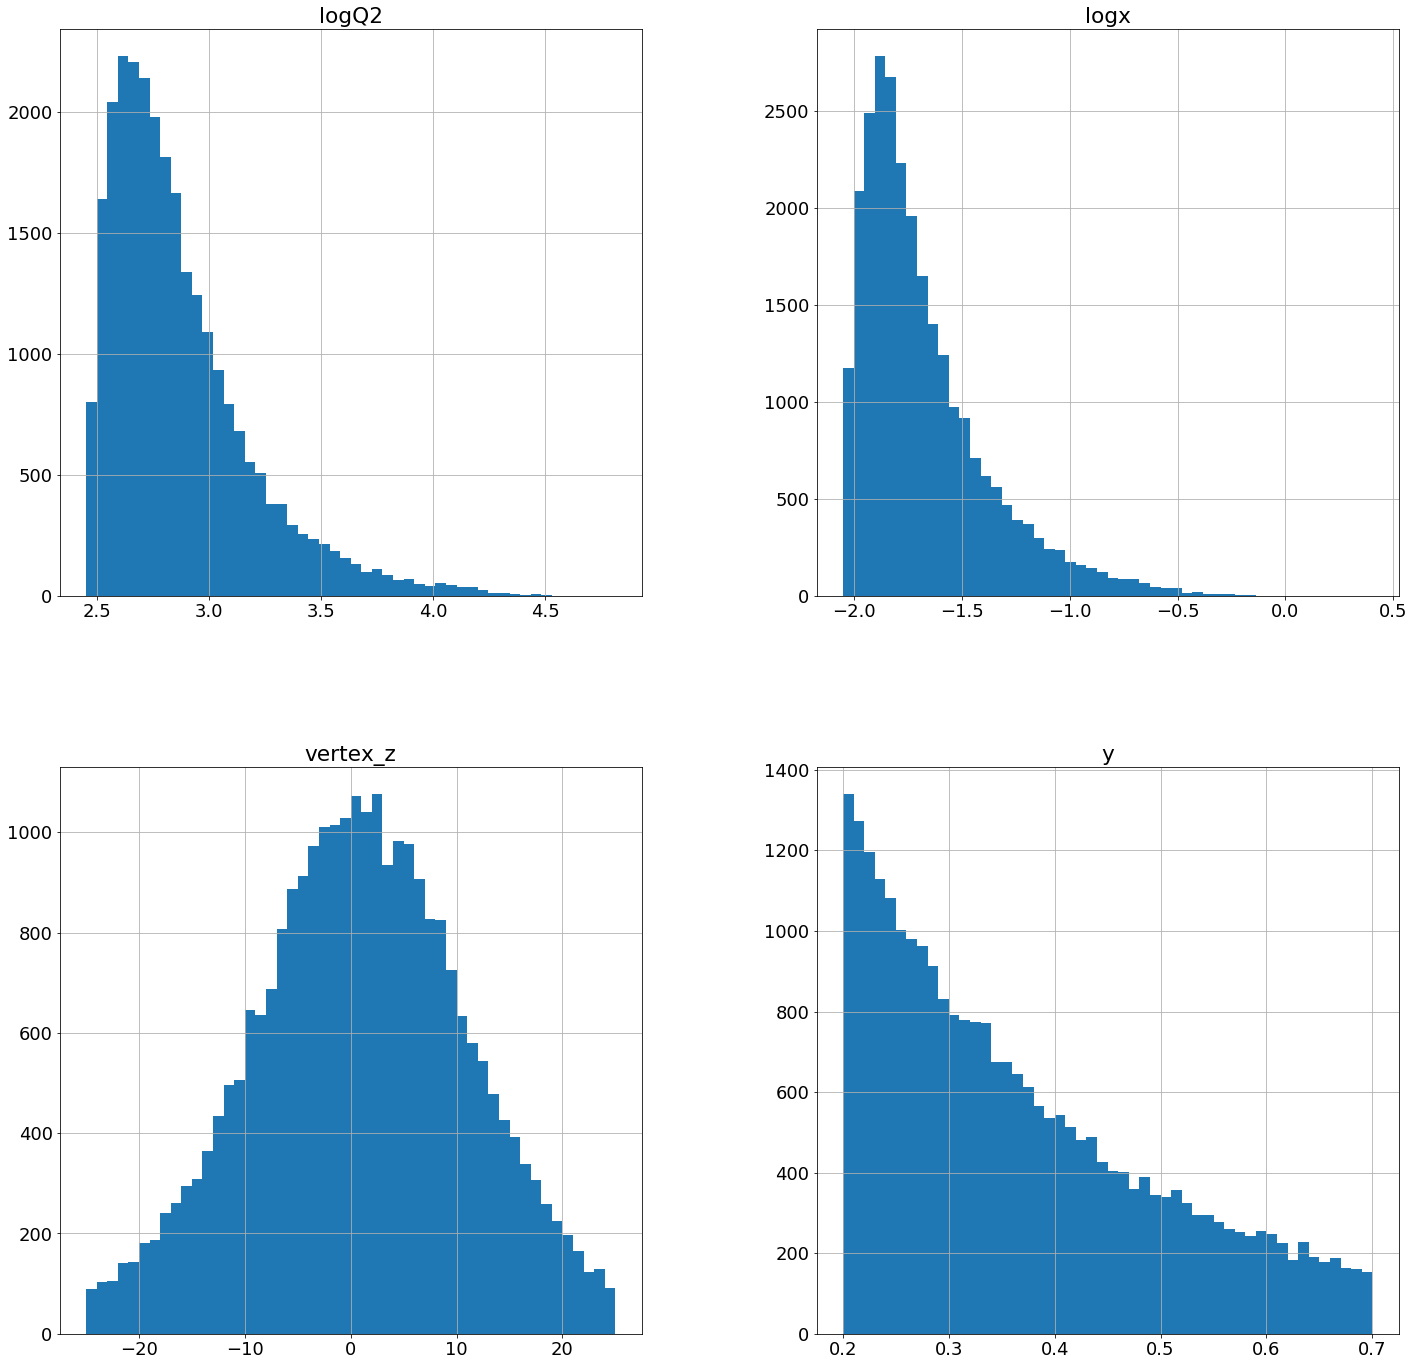

In [24]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

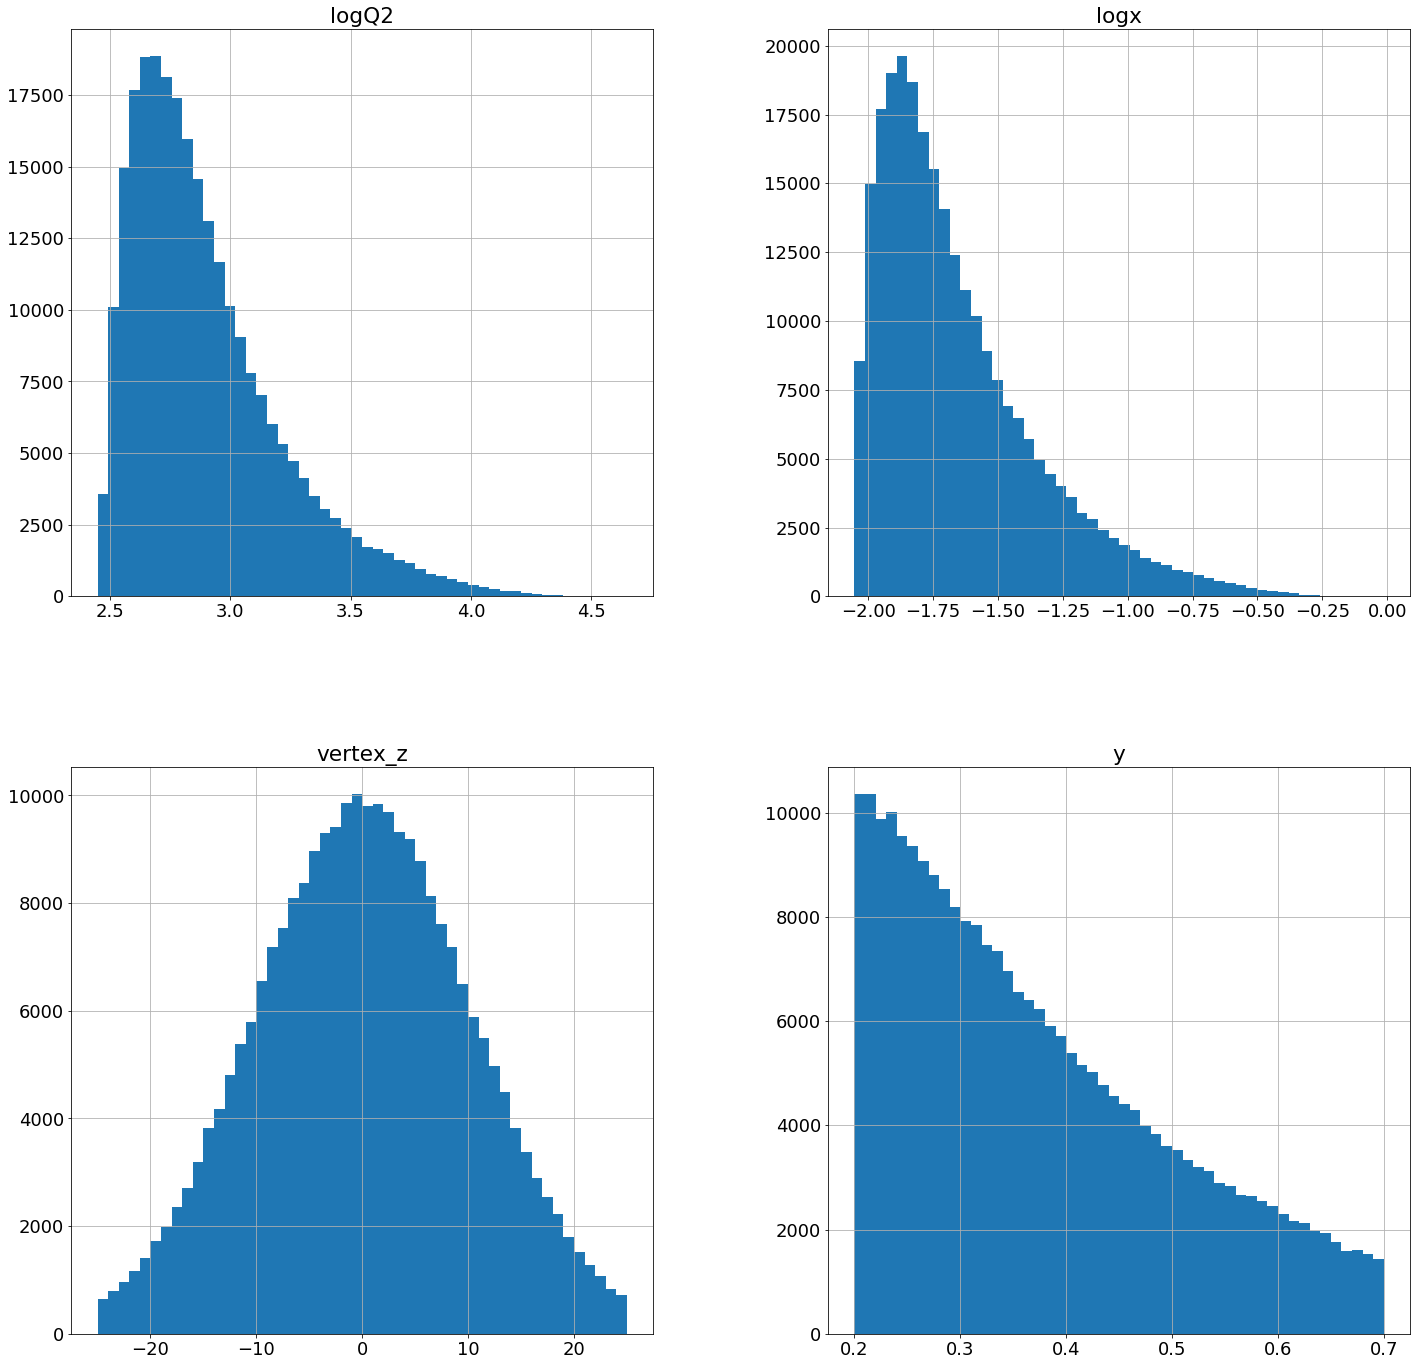

In [25]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

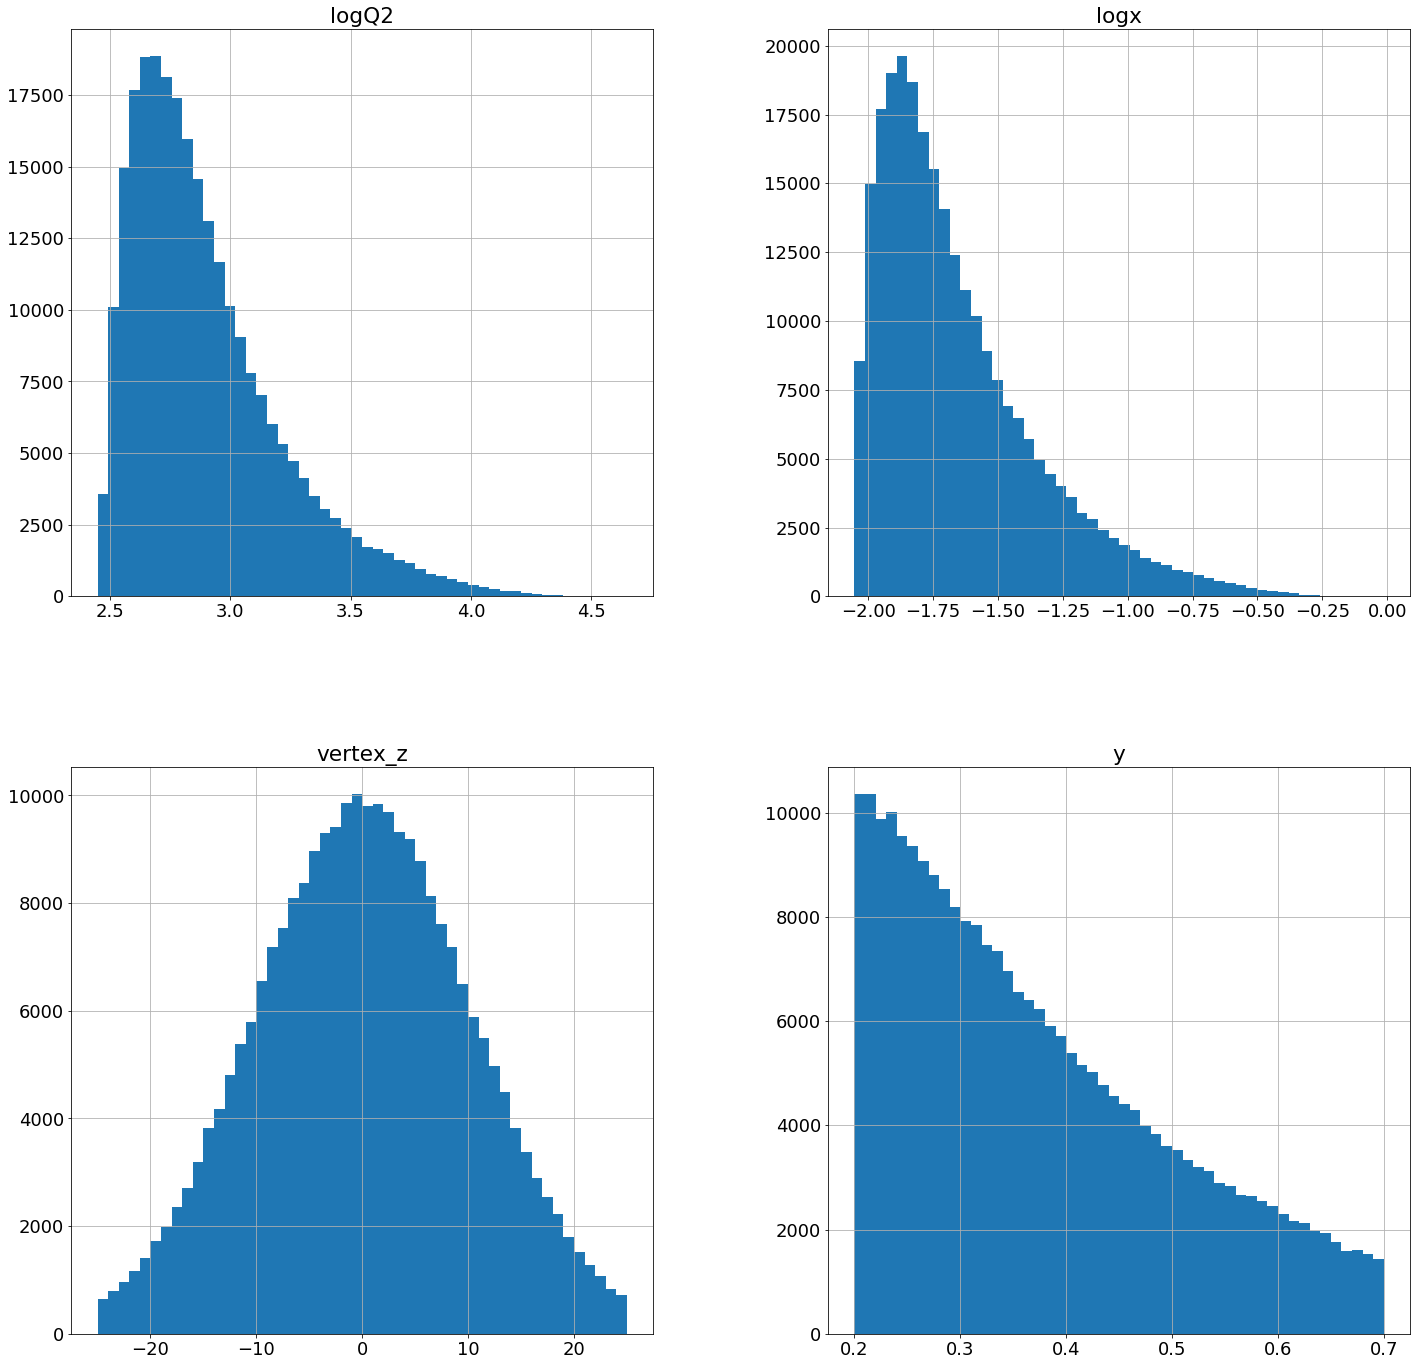

In [26]:
rc('text', usetex=False)
altmc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

## Get jet data and apply selection

In [ ]:
df_jet      = applyCutsJets(getJetData(['data_calibrated.root']))
dfraw_jet      = applyCutsJets(getJetData(['data_notcalibrated.root']))
mc_jet = applyCutsJets(getJetData(['djangoh.root'],isMC=True))
altmc_jet = applyCutsJets(getJetData(['rapgap.root'],isMC=True))


Processed data_calibrated.root in 7.3 seconds
abs(vertex_z)<25 and and vertex_z!=0 100990  fraction kept: 77.5
0.2 < y < 0.7 100990  fraction kept: 100.0
Q2>150 100990  fraction kept: 100.0
e_pt >15 31930  fraction kept: 31.6
jet_pt>10 26108  fraction kept: 81.8


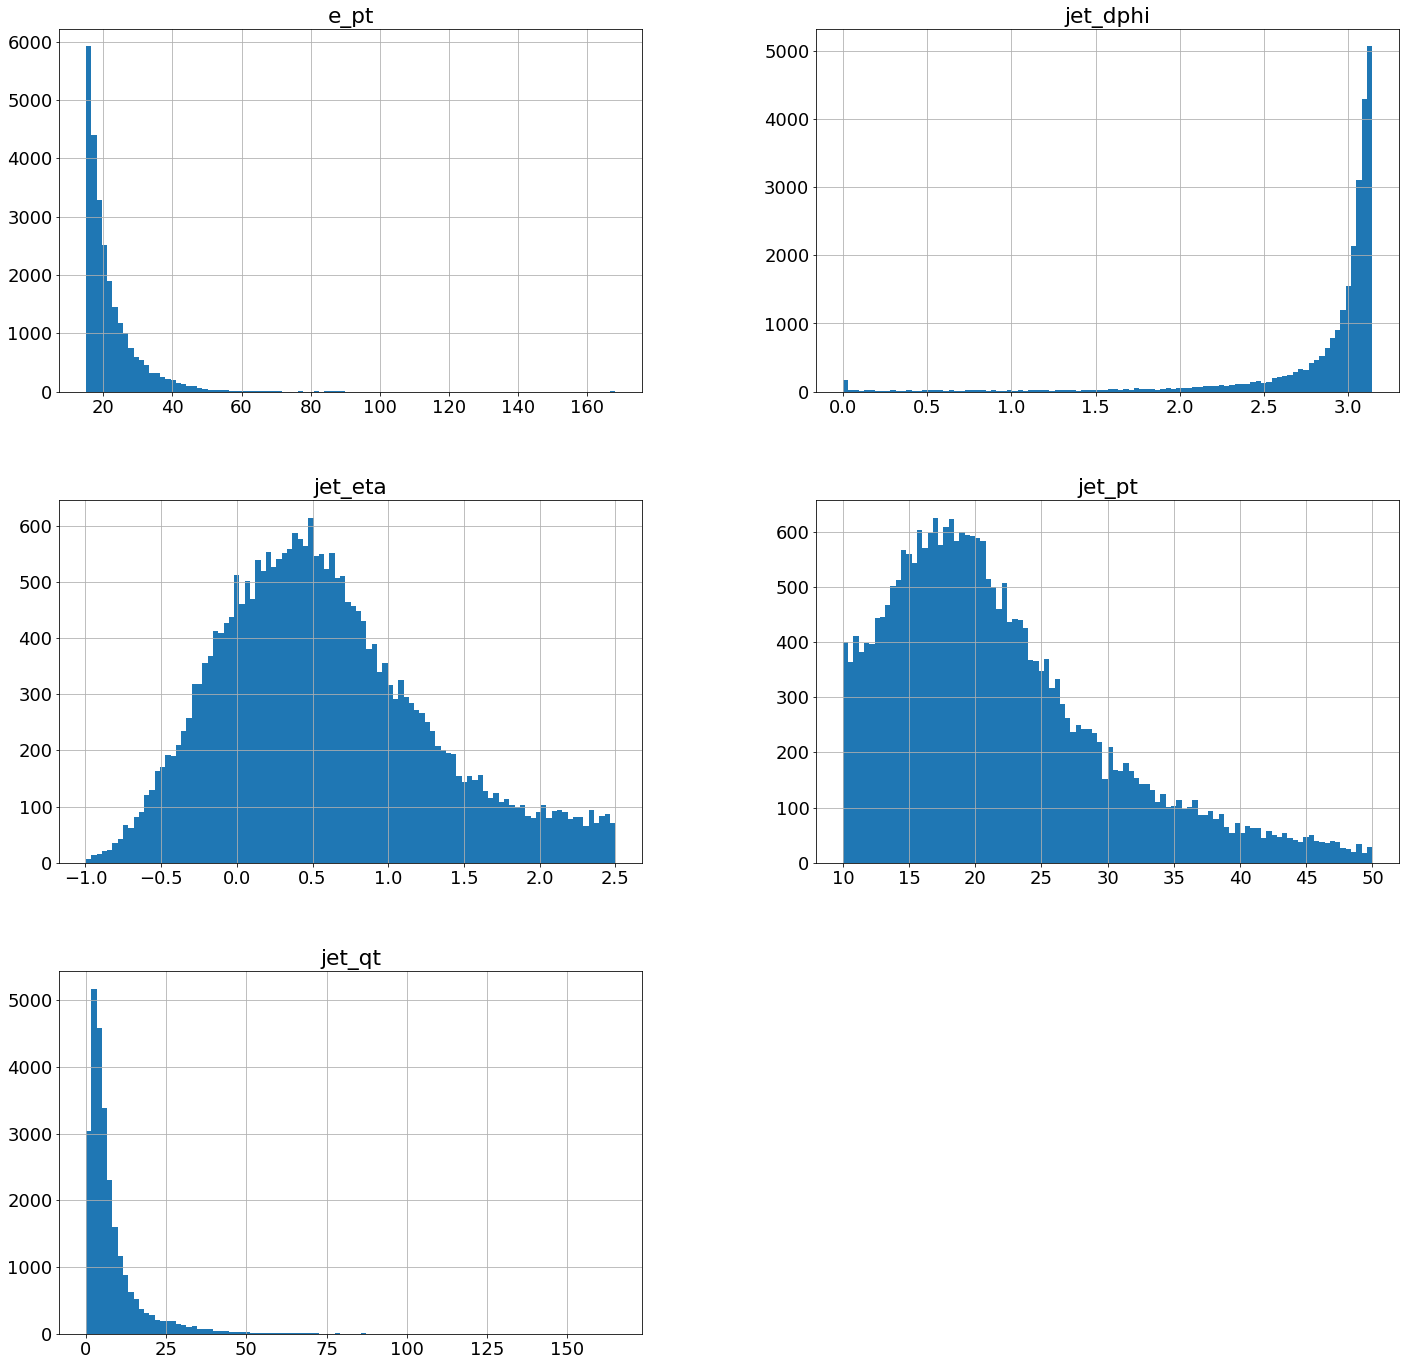

In [30]:
rc('text', usetex=False)
df_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()


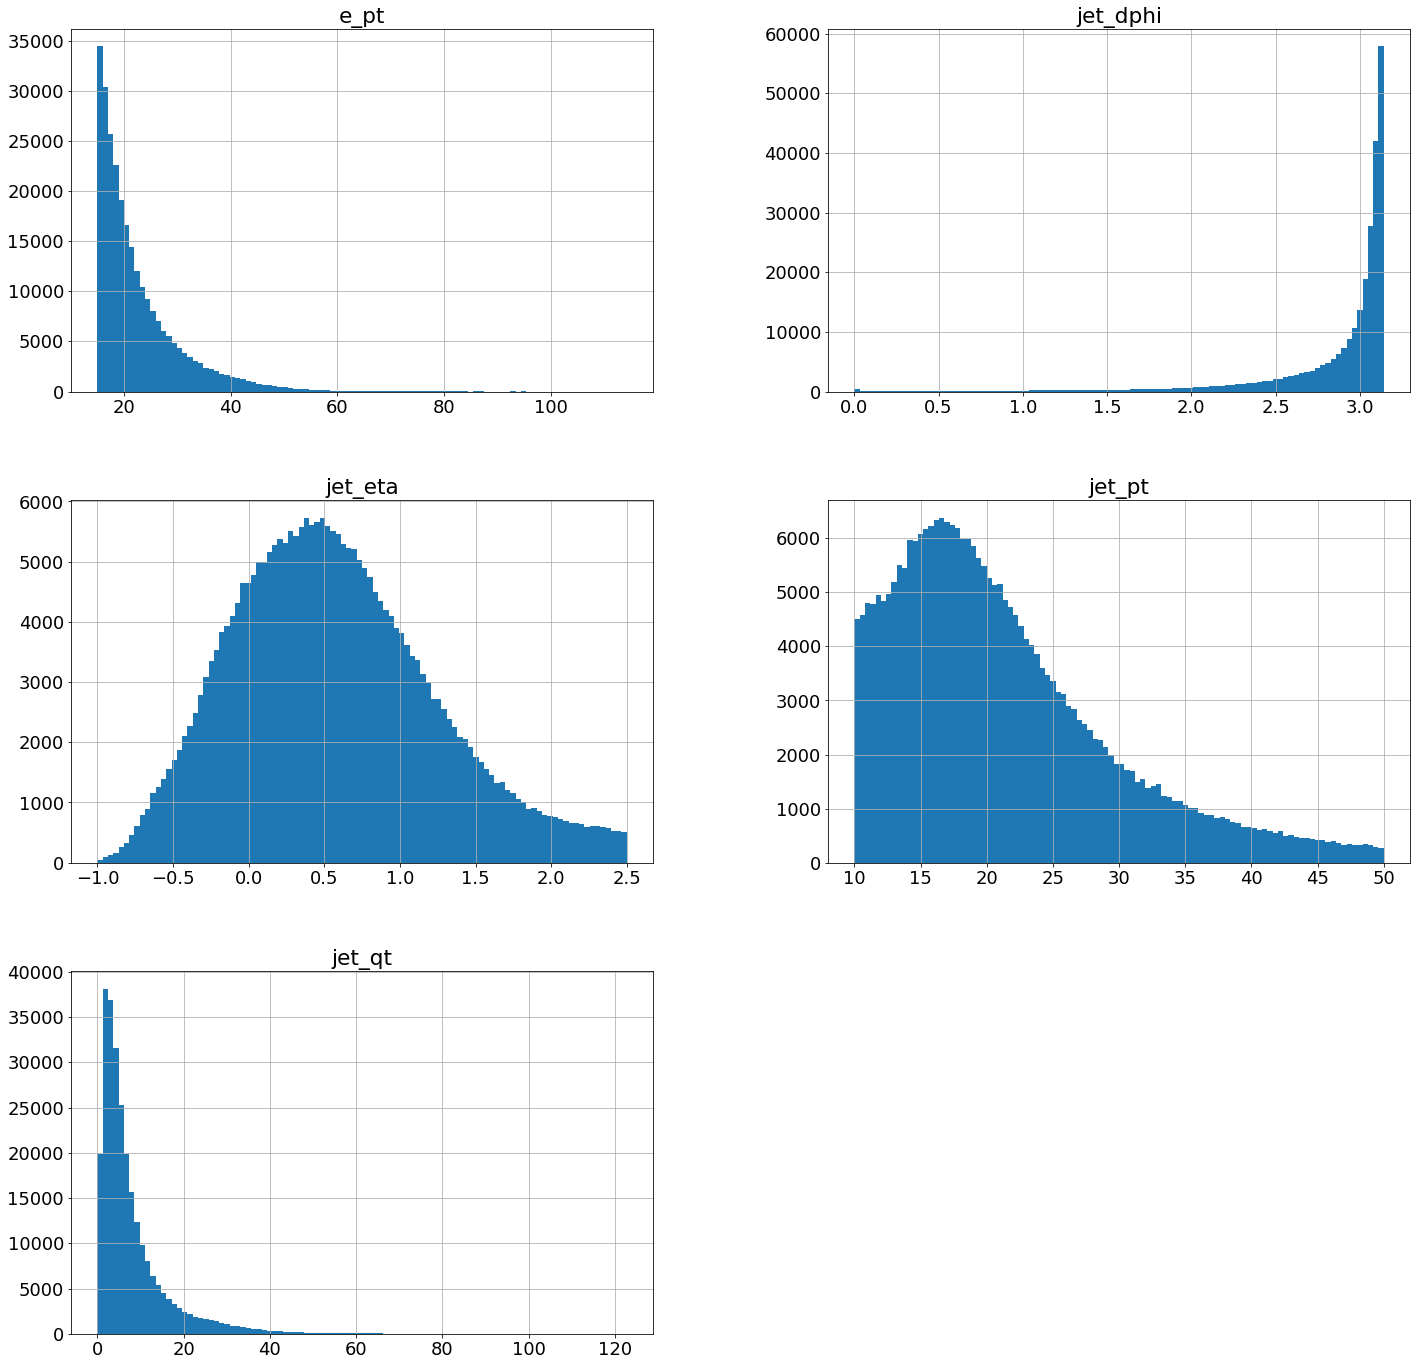

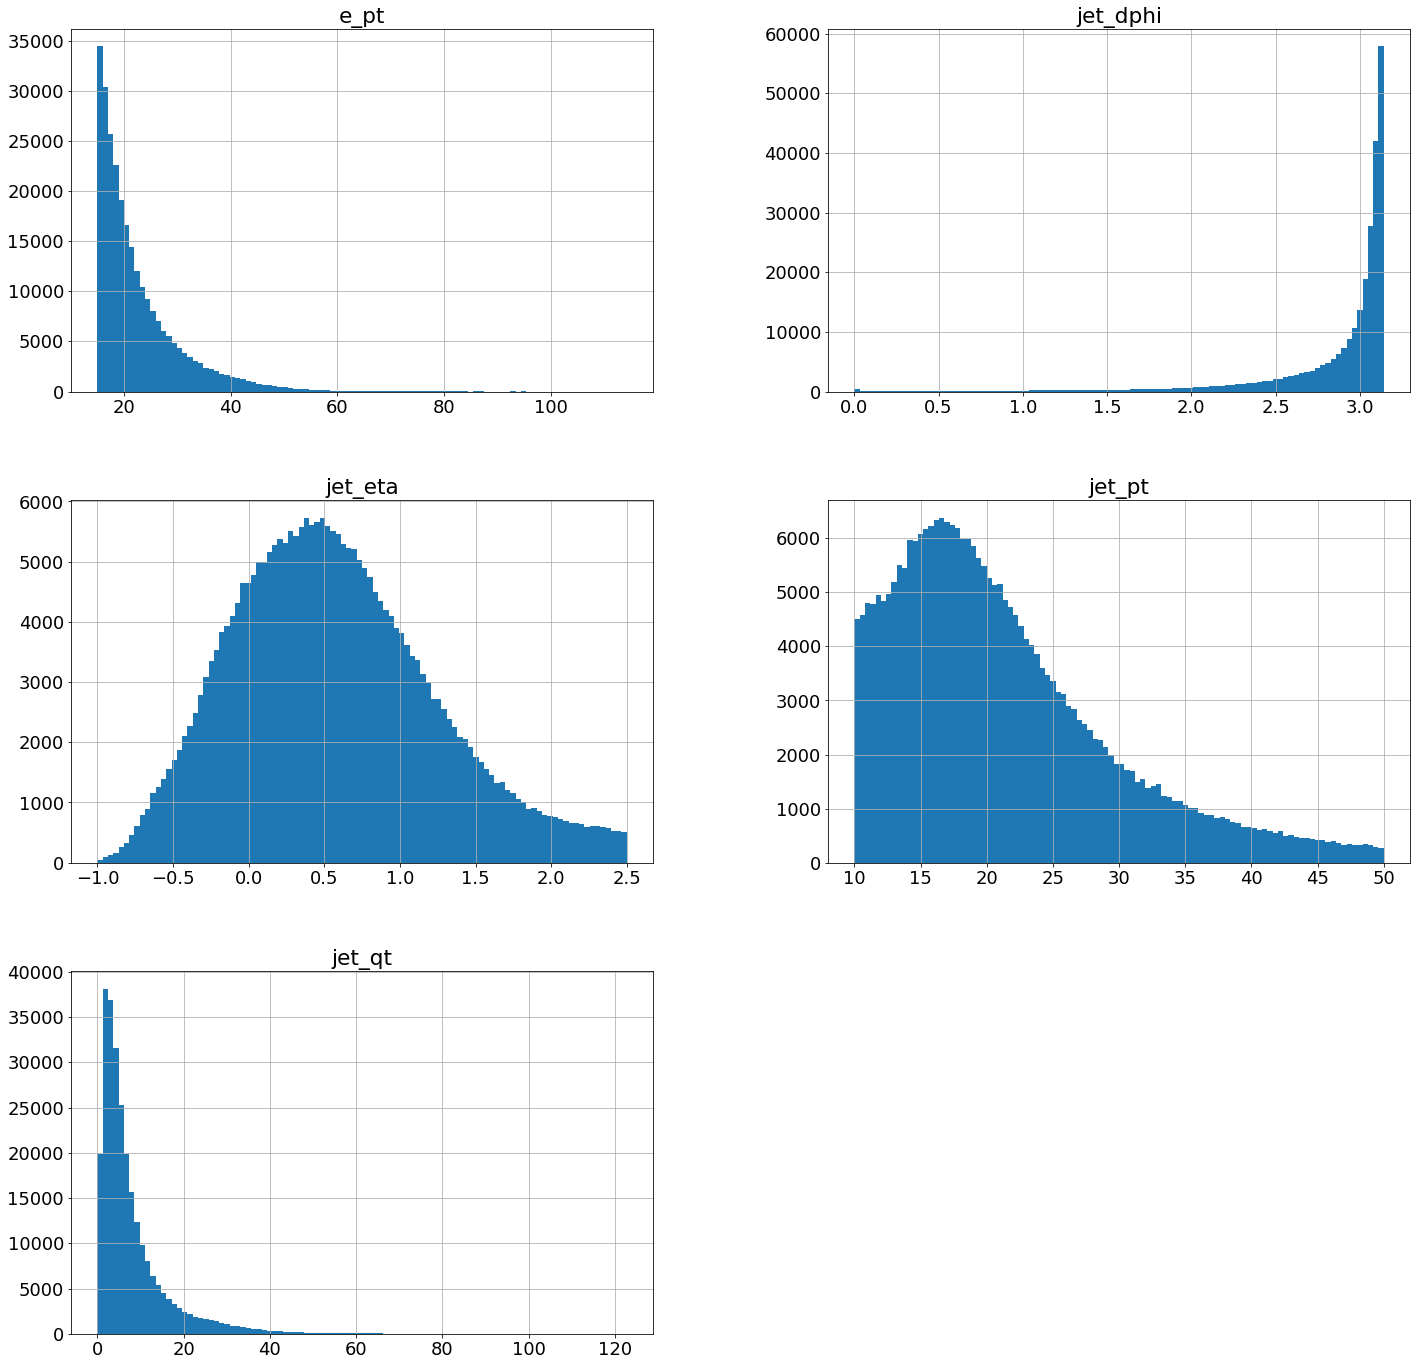

In [31]:
mc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()
altmc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()

## Peek into data format

In [32]:
df_jet.head()

,Q2,ptmiss,ptratio,e_eta,y_es,Q2_es,jet_eta,acoplanarity,jet_z,vertex_z,...,jet_dphi,jet_pt,jet_phi,x_es,y,x,Empz,__array_index,jet_qtnormjetpt,jet_qtnormept
1,1085.786377,3.116422,1.110134,0.077029,0.729046,1086.573730,0.492921,172.882202,0.349895,-1.840820,...,3.030781,21.930737,-1.007659,0.014674,0.694093,0.015413,50.331505,0,0.196842,0.236867
2,1085.786377,3.116422,1.110134,0.077029,0.729046,1086.573730,0.959449,172.882202,0.147721,-1.840820,...,1.293793,14.762734,0.950953,0.014674,0.694093,0.015413,50.331505,1,1.788652,1.448858
3,1085.786377,3.116422,1.110134,0.077029,0.729046,1086.573730,-0.196312,172.882202,0.343694,-1.840820,...,1.968088,10.813274,-2.070352,0.014674,0.694093,0.015413,50.331505,2,1.592609,0.944930
12,593.638611,5.533139,0.743363,-0.686768,0.117475,594.069092,1.773144,177.827484,0.241512,4.702271,...,3.103537,18.003056,-2.358474,0.049789,0.229465,0.025490,47.254997,0,0.192507,0.162045
15,341.353729,1.722699,0.895417,-0.941359,0.258633,341.601257,0.391211,178.229523,0.839099,-9.306458,...,3.068993,17.984358,0.697269,0.013004,0.262758,0.012800,54.669891,0,0.136199,0.154405


In [33]:
mc_jet.head()

,genjet_pt,jet_dphi,jet_pt,Q2,ptratio,y_es,genjet_p,jet_p,jet_eta,genjet_z,...,Weight,ptmiss,jet_phi,x_es,y,x,Empz,__array_index,jet_qtnormjetpt,jet_qtnormept
0,20.422804,2.875142,16.973562,308.923553,0.854048,0.269797,22.613100,18.682884,0.445104,0.776283,...,1.000000,2.440001,-0.885325,0.011273,0.267832,0.011356,55.436275,0,0.274808,0.310149
7,16.841614,3.025469,15.471179,769.722717,0.937012,0.733756,21.670870,19.576170,-0.713251,0.937259,...,1.000000,1.654459,-2.556005,0.010328,0.689594,0.010990,48.833092,0,0.116010,0.116114
9,14.224248,3.058226,13.372172,314.569122,0.808806,0.217115,14.361694,13.562392,0.168473,0.924958,...,1.945175,3.017151,-3.073869,0.014265,0.233756,0.013249,53.594379,0,0.184369,0.158799
10,24.829397,2.430487,25.489843,1342.502075,1.024087,0.275274,89.671570,94.656052,1.986474,0.226412,...,1.000000,5.588820,-2.739263,0.048017,0.272603,0.048487,55.529240,0,0.803308,0.655248
11,15.729913,2.525619,15.636805,1342.502075,1.024087,0.275274,17.411993,17.140900,0.435168,0.642255,...,1.000000,5.588820,-1.412184,0.048017,0.272603,0.048487,55.529240,1,1.315868,0.658441


## pT spectrum

Cross section [   0.            0.         1146.18159685 3311.60614392 1930.17321514
 1093.1397448   628.7090343   363.92628671  208.41971714  123.21520273
   72.48451616]
Cross section [ 972.59299548 1058.52781988 1328.60405026 1490.83678321 1488.47546034
 1161.88106469  792.6168052   495.72415245  282.29249023  163.54946108
   90.71591576]


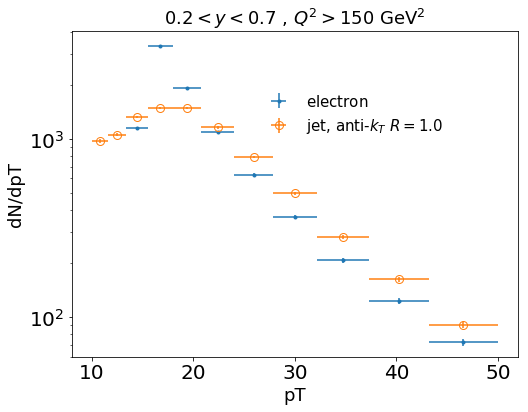

In [34]:
import seaborn as sns
nbins = 12
minpt = 10
maxpt = max(df_jet['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df.query('e_pt>5')['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


y, x  = np.histogram(df_jet.query('jet_pt>5')['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2

yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 
plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label='$\mathrm{jet}$, $\mathrm{anti}$-$k_{T}$ $R=1.0$')

plt.yscale('log')
ax1.set_xlabel('pT' ,fontsize=18)
ax1.set_ylabel('dN/dpT', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 150\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

## DATA/MC comparisons

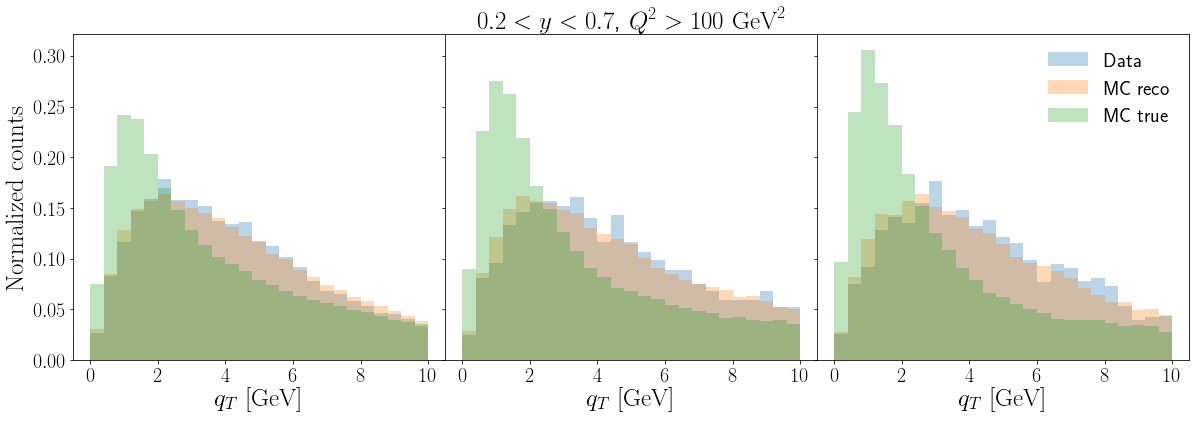

In [36]:
from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    #plot data
    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC reco')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC true')
    
    
    axs[counter].xaxis.set_label_text(r'$q_{T}$  $\mathrm{[GeV]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')

17.105728  mean lepton pt
0.36292943  mean inelasticity
25.565693  mean jet p
18.002504  mean jet pT
count    14360.000000
mean        18.002504
std          5.093483
min         10.002194
25%         14.364927
50%         17.405561
75%         20.717062
max         49.344612
Name: jet_pt, dtype: float64
0.0137456795  mean x
487.13824  mean Q2
count    14360.000000
mean       487.138245
std        152.442032
min        281.507263
25%        378.711563
50%        452.856476
75%        550.659378
max       1270.057373
Name: Q2, dtype: float64
###########


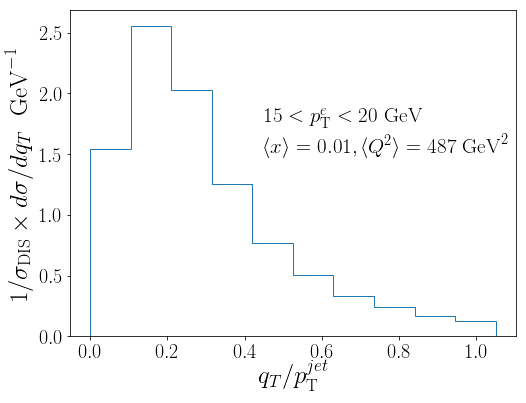

In [38]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut['jet_qtnormjetpt'],bins=10,range=(0,1.05),normed=True,histtype='step')    
plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.text(0.45,1.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

17.105728  mean lepton pt
0.36292943  mean inelasticity
25.565693  mean jet p
18.002504  mean jet pT
count    14360.000000
mean        18.002504
std          5.093483
min         10.002194
25%         14.364927
50%         17.405561
75%         20.717062
max         49.344612
Name: jet_pt, dtype: float64
0.0137456795  mean x
487.13824  mean Q2
count    14360.000000
mean       487.138245
std        152.442032
min        281.507263
25%        378.711563
50%        452.856476
75%        550.659378
max       1270.057373
Name: Q2, dtype: float64
###########
11845
17.194939  mean lepton pt
0.377901  mean inelasticity
23.55017  mean jet p
17.235025  mean jet pT
count    132836.000000
mean         17.235025
std           4.867217
min          10.000016
25%          13.688513
50%          16.555481
75%          19.810159
max          49.963036
Name: jet_pt, dtype: float64
0.013651384  mean x
504.23547  mean Q2
count    132836.000000
mean        504.235474
std         155.066162
min         281.

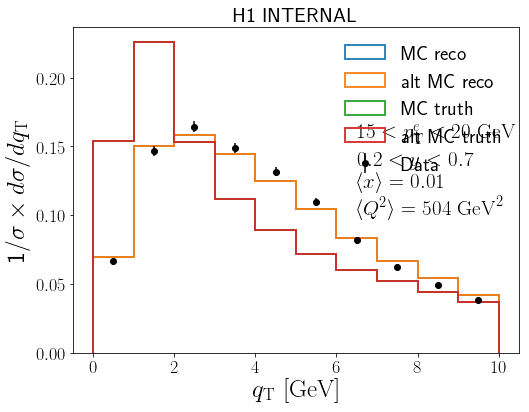

In [39]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = np.sum(y)
print integral 
y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, fmt='o',ls='none',label='Data',color='black')

#plot MC
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='alt MC reco',histtype='step',lw=2)
printSummary(df_cut)


df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC truth',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='alt MC truth',histtype='step',lw=2)
printSummary(df_cut)



plt.xlabel(r'$q_{\mathrm{T}} $ $\mathrm{[GeV]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


plt.text(6.5,0.10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()) + '$\n$'+ r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()), fontsize=21)


#plt.text(6.5,0.10, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, r'$\mathrm{H1}$ $\mathrm{INTERNAL}$', fontsize=28)

#plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('H1 INTERNAL', fontsize=21)
plt.savefig('H1_qtplot.png', bbox_inches='tight')
plt.savefig('H1_qtplot.pdf', bbox_inches='tight')

17.105728  mean lepton pt
0.36292943  mean inelasticity
25.565693  mean jet p
18.002504  mean jet pT
count    14360.000000
mean        18.002504
std          5.093483
min         10.002194
25%         14.364927
50%         17.405561
75%         20.717062
max         49.344612
Name: jet_pt, dtype: float64
0.0137456795  mean x
487.13824  mean Q2
count    14360.000000
mean       487.138245
std        152.442032
min        281.507263
25%        378.711563
50%        452.856476
75%        550.659378
max       1270.057373
Name: Q2, dtype: float64
###########
12857.0
[1995 3434 2849 1842 1117  774  496  350]
[44.66542287 58.6003413  53.37602458 42.91852747 33.42154993 27.82085549
 22.27105745 18.70828693]
[0.15516839 0.26709186 0.22159135 0.14326826 0.08687874 0.06020067
 0.03857821 0.02722252]


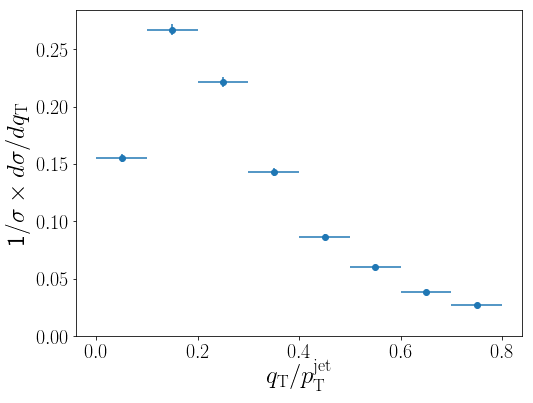

In [40]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=8,range=(0,0.80))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

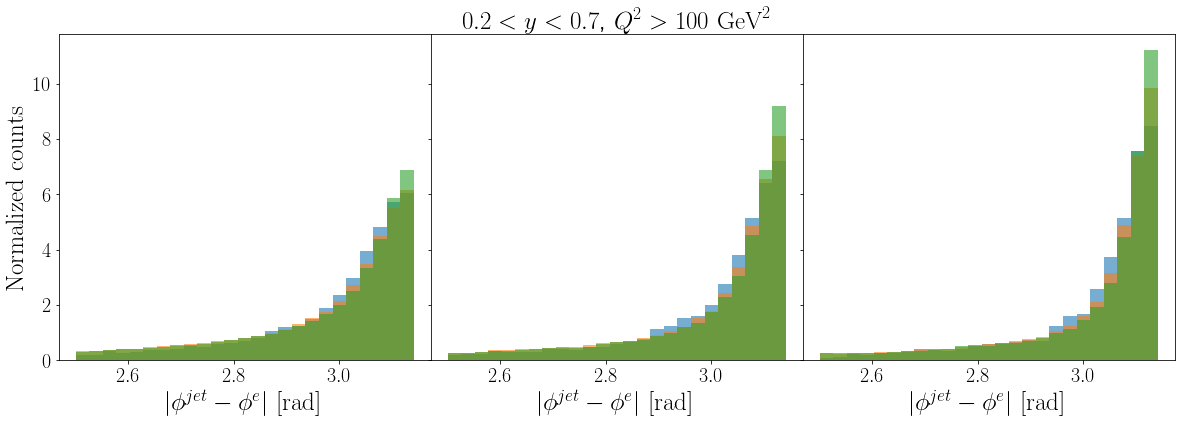

In [44]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,25),(25,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    axs[counter].xaxis.set_label_text(r'$|\phi^{jet}-\phi^e|$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    #axs[counter].text(0.07,11, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetAzimuthal.pdf', bbox_inches='tight')

## Event variable

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 9 Text xticklabel objects>)

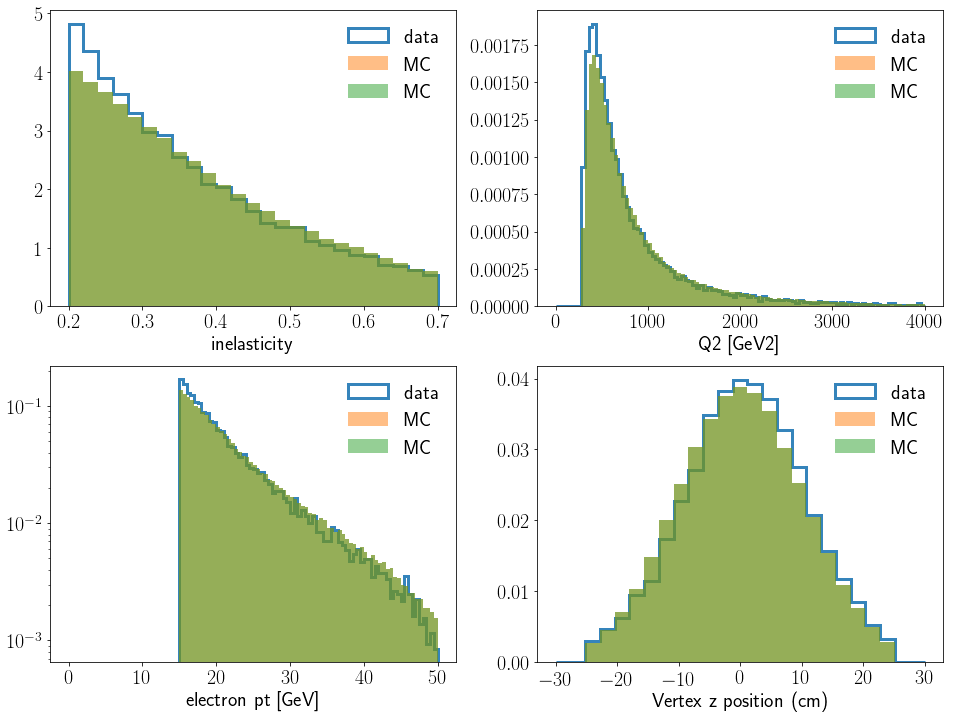

In [60]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y'],bins=25,normed=True,range=(0.2,0.7),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y'],bins=25,normed=True,range=(0.2,0.70),alpha=0.5,label='MC')
plt.hist(altmc_jet['y'],bins=25,normed=True,range=(0.2,0.70),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.xlabel('Q2 [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.xlabel('electron pt [GeV]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')
plt.hist(altmc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

(array([-40., -20.,   0.,  20.,  40.]), <a list of 5 Text xticklabel objects>)

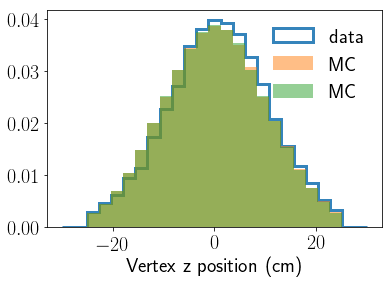

In [72]:
plt.hist(df_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC',weights=mc_jet['WeightGen'])
plt.hist(altmc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

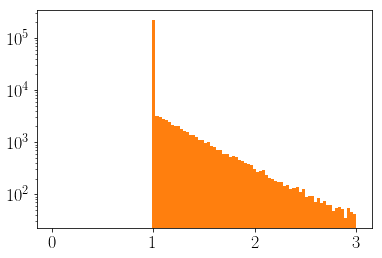

In [79]:
plt.hist(mc_jet['Weight'],bins=100,range=(0,3))
plt.hist(mc_jet['WeightGen'],bins=100,range=(0,3))

plt.yscale('log')
plt.show()

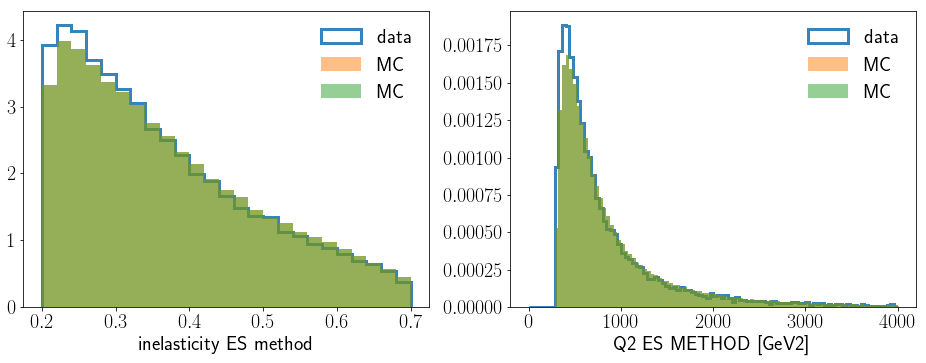

In [59]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y_es'],bins=25,normed=True,range=(0.2,0.7),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y_es'],bins=25,normed=True,range=(0.2,0.7),alpha=0.5,label='MC')
plt.hist(altmc_jet['y_es'],bins=25,normed=True,range=(0.2,0.7),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity ES method',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(222)
plt.hist(df_jet['Q2_es'],bins=100,normed=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2_es'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['Q2_es'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.xlabel('Q2 ES METHOD [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


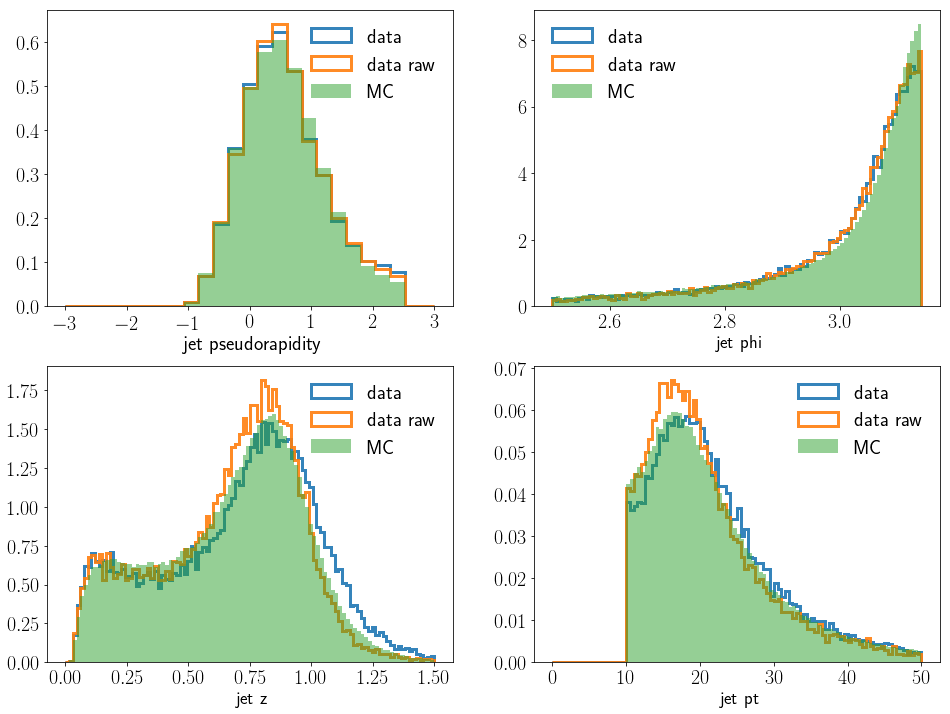

In [80]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.5,label='MC')
#plt.hist(altmc_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('jet pseudorapidity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.5,label='MC')
#plt.hist(altmc_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.5,label='MC')
plt.xlabel('jet phi ')
#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.5,label='MC')
#plt.hist(altmc_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.5,label='MC')
plt.xlabel('jet z ')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)

plt.hist(mc_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
#plt.hist(altmc_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.xlabel('jet pt ')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 7 Text xticklabel objects>)

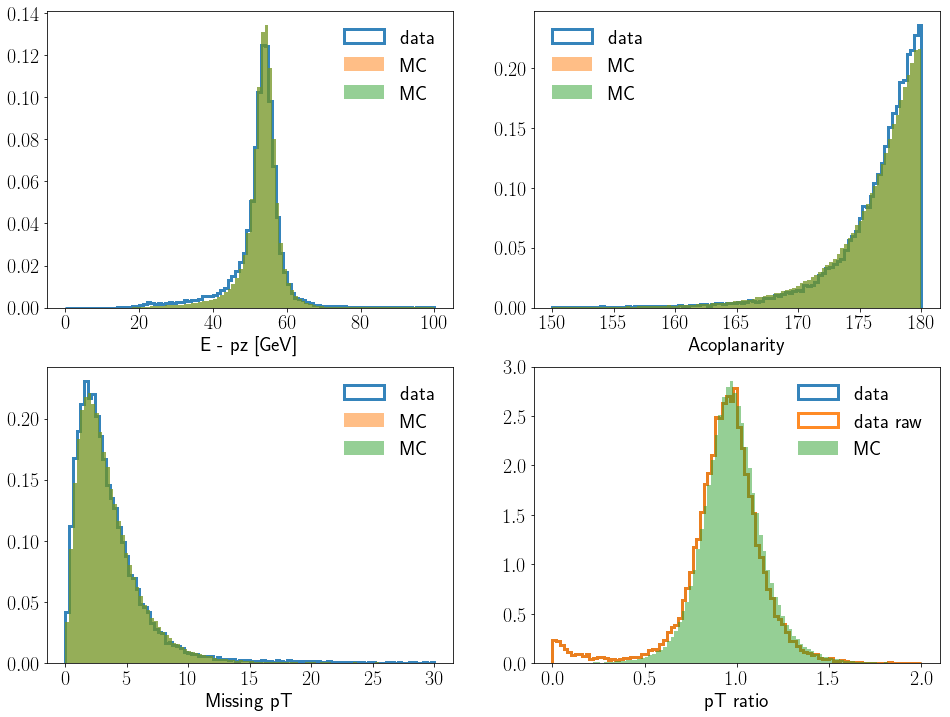

In [81]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df['Empz'],bins=100,normed=True,range=(0,100.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['Empz'],bins=100,normed=True,range=(0,100.0),alpha=0.5,label='MC')
plt.hist(altmc['Empz'],bins=100,normed=True,range=(0.0,100.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('E - pz [GeV]',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(222)
plt.hist(df['acoplanarity'],bins=100,normed=True,range=(150,180.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['acoplanarity'],bins=100,normed=True,range=(150,180.0),alpha=0.5,label='MC')
plt.hist(altmc['acoplanarity'],bins=100,normed=True,range=(150,180.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Acoplanarity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(223)
plt.hist(df['ptmiss'],bins=100,normed=True,range=(0.0,30.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['ptmiss'],bins=100,normed=True,range=(0.0,30.0),alpha=0.5,label='MC')
plt.hist(altmc['ptmiss'],bins=100,normed=True,range=(0.0,30.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Missing pT',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(224)
plt.hist(df['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)

plt.hist(mc['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.5,label='MC')
#plt.hist(altmc['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('pT ratio',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

## Azimuthal separation between lepton and jet

17.105728  mean lepton pt
0.36292943  mean inelasticity
25.565693  mean jet p
18.002504  mean jet pT
count    14360.000000
mean        18.002504
std          5.093483
min         10.002194
25%         14.364927
50%         17.405561
75%         20.717062
max         49.344612
Name: jet_pt, dtype: float64
0.0137456795  mean x
487.13824  mean Q2
count    14360.000000
mean       487.138245
std        152.442032
min        281.507263
25%        378.711563
50%        452.856476
75%        550.659378
max       1270.057373
Name: Q2, dtype: float64
###########
11292.0
17.194939  mean lepton pt
0.377901  mean inelasticity
23.55017  mean jet p
17.235025  mean jet pT
count    132836.000000
mean         17.235025
std           4.867217
min          10.000016
25%          13.688513
50%          16.555481
75%          19.810159
max          49.963036
Name: jet_pt, dtype: float64
0.013651384  mean x
504.23547  mean Q2
count    132836.000000
mean        504.235474
std         155.066162
min         28

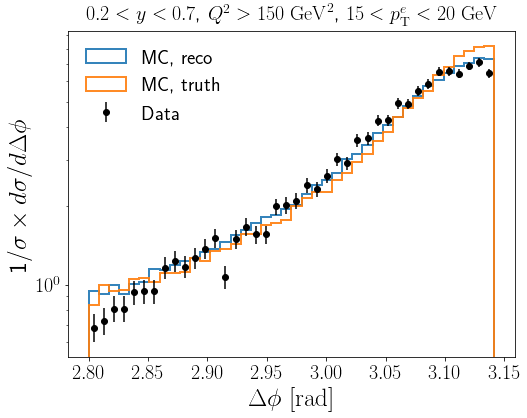

In [82]:
rc('text', usetex=True)
fig = plt.figure(figsize=(8,6))
df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

mindphi = 2.8
nbins = 40
y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
integral = np.sum(y)
print 1.0*integral 
y = y/width
erry = erry/width
y = np.true_divide(y,integral)
erry= np.true_divide(erry,integral)

plt.errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')




    
    #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
printSummary(df_cut)
    
        #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
axs[counter].hist(df_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
printSummary(df_cut)
    

        #plot mc
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
printSummary(df_cut)
    





plt.xlabel(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/d\Delta\phi}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
 #                   r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.title('$0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$, $15<p_{\mathrm{T}}^{e}<20$ $\mathrm{GeV}$',fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_deltaphi.png', bbox_inches='tight')
plt.savefig('H1_deltaphi.pdf', bbox_inches='tight')
plt.yscale('log')
plt.savefig('H1_deltaphi_log.png', bbox_inches='tight')
plt.savefig('H1_deltaphi_log.pdf', bbox_inches='tight')

## Azimuthal separation between lepton and jet for various electron pT ranges/'

###########
12781.0
sum over y  28.055173090048662
sum over mcy 28.055173968950854
y
[0.19975123 0.27657862 0.28316383 0.33145534 0.37316164 0.44340383
 0.48730845 0.59486355 0.6541304  0.77485916 1.04046244 1.20948271
 1.50581696 1.9689764  2.77456652 3.8677106  5.36255222 5.90692919]
mcy
[0.32723112 0.37572795 0.41222303 0.43206265 0.50529775 0.5195039
 0.61870609 0.67283225 0.78354218 0.84918435 1.01745365 1.20776695
 1.48895058 1.85145212 2.49415755 3.49299625 4.95818829 6.04789731]
[-0.38957142 -0.26388594 -0.31308101 -0.23285353 -0.26150149 -0.14648604
 -0.21237489 -0.11588134 -0.1651625  -0.08752539  0.0226141   0.00142061
  0.01132769  0.06347681  0.11242632  0.10727591  0.08155477 -0.02330862]
###########
5144.0
sum over y  28.05517253010484
sum over mcy 28.055172942657002
y
[0.19634256 0.2181584  0.35450739 0.29451384 0.3272376  0.39268511
 0.40359573 0.47994847 0.51267223 0.68719895 0.78537023 1.19987118
 1.4289375  1.73435925 2.38883445 3.83958778 5.59030892 7.22104293]
mcy

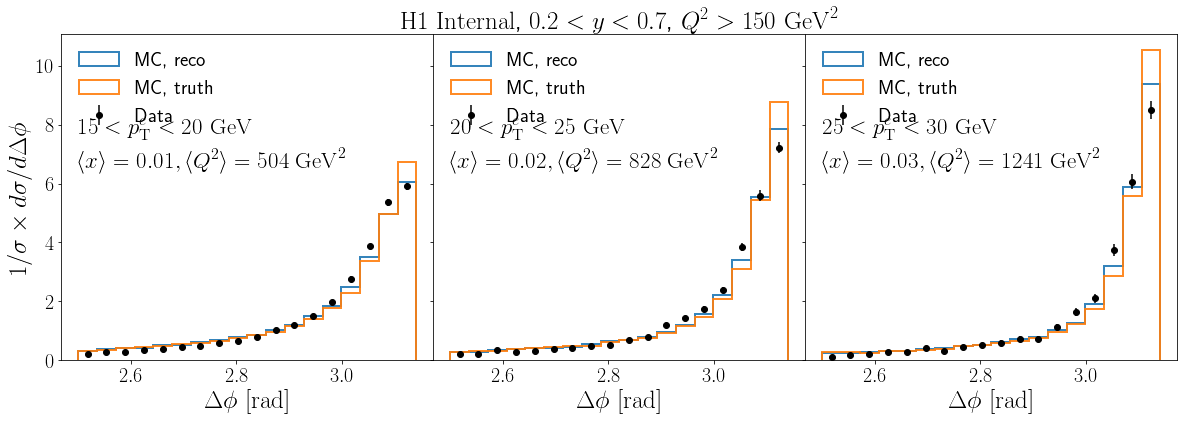

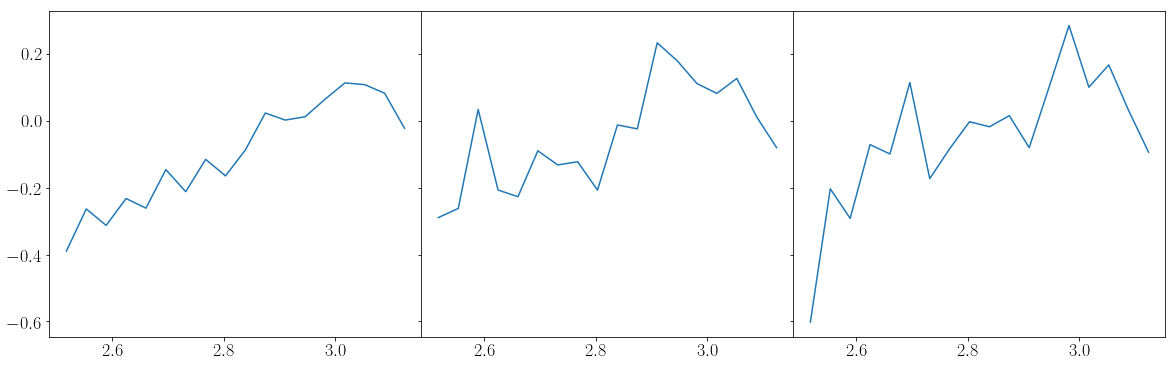

In [107]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})
fig2, axs2 = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 18 #36
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)
    print 'sum over y ', np.sum(y)
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc

    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    mcy, mcx  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi))
    mcy = np.true_divide(mcy,np.sum(mcy))
    mcy = mcy/width
    print 'sum over mcy' , np.sum(mcy)

    #mcy = np.true_divide(mcy,integral)

    axs[counter].hist(df_cut['jet_dphi'],bins=nbins,range=(2.5,np.pi),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    #printSummary(df_cut)
    
        #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=nbins,range=(2.5,np.pi),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    #printSummary(df_cut)
    
    print 'y'
    print y 
    print 'mcy'
    print mcy
    ratio = np.divide(y-mcy, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    print ratio
    
    axs2[counter].plot(x,ratio)
    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(2.5,6.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

#np.divide(self.data- fitTotal , totalerror,  out=np.zeros_like(totalerror), where=totalerror!=0)

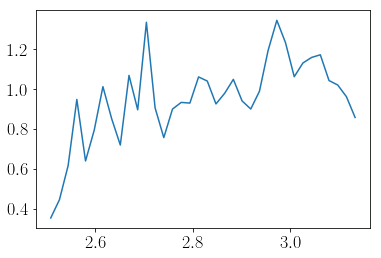

In [102]:
plt.plot(x,ratio)

## qT distribution


###########
11845.0
17.194939  mean lepton pt
0.377901  mean inelasticity
23.55017  mean jet p
17.235025  mean jet pT
count    132836.000000
mean         17.235025
std           4.867217
min          10.000016
25%          13.688513
50%          16.555481
75%          19.810159
max          49.963036
Name: jet_pt, dtype: float64
0.013651384  mean x
504.23547  mean Q2
count    132836.000000
mean        504.235474
std         155.066162
min         281.324127
25%         392.925041
50%         469.730515
75%         571.933777
max        1322.431519
Name: Q2, dtype: float64
17.194939  mean lepton pt
0.377901  mean inelasticity
23.55017  mean jet p
17.235025  mean jet pT
count    132836.000000
mean         17.235025
std           4.867217
min          10.000016
25%          13.688513
50%          16.555481
75%          19.810159
max          49.963036
Name: jet_pt, dtype: float64
0.013651384  mean x
504.23547  mean Q2
count    132836.000000
mean        504.235474
std         155.066162
mi

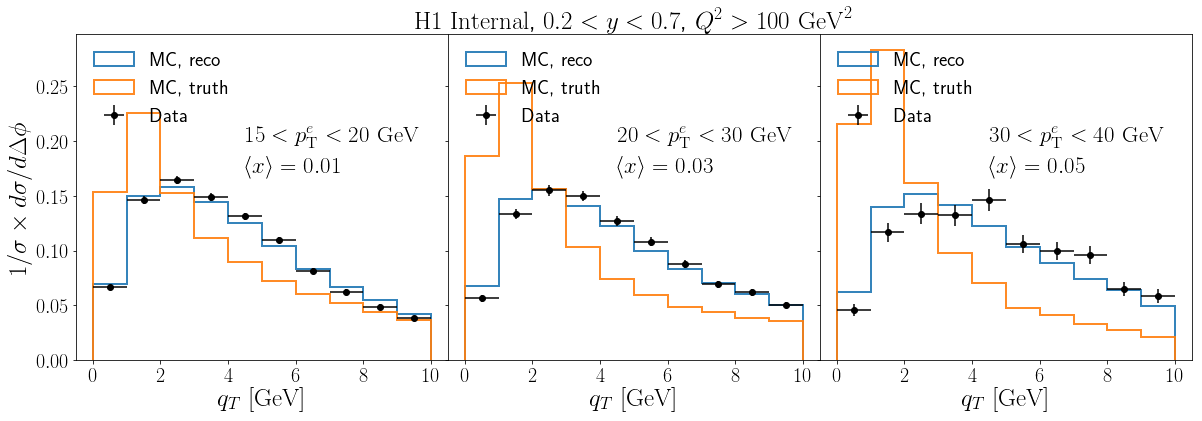

In [84]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,30),(30,40)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    #y = y/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    printSummary(df_cut)
    
    #plot mc
    df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{T}$ $\mathrm{[GeV]}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')

    axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqt.png', bbox_inches='tight')
plt.savefig('H1_Leptonqt.pdf', bbox_inches='tight')

###########
13316.0
17.194939  mean lepton pt
0.377901  mean inelasticity
23.55017  mean jet p
17.235025  mean jet pT
count    132836.000000
mean         17.235025
std           4.867217
min          10.000016
25%          13.688513
50%          16.555481
75%          19.810159
max          49.963036
Name: jet_pt, dtype: float64
0.013651384  mean x
504.23547  mean Q2
count    132836.000000
mean        504.235474
std         155.066162
min         281.324127
25%         392.925041
50%         469.730515
75%         571.933777
max        1322.431519
Name: Q2, dtype: float64


KeyError: 'genjet_qtnormept'

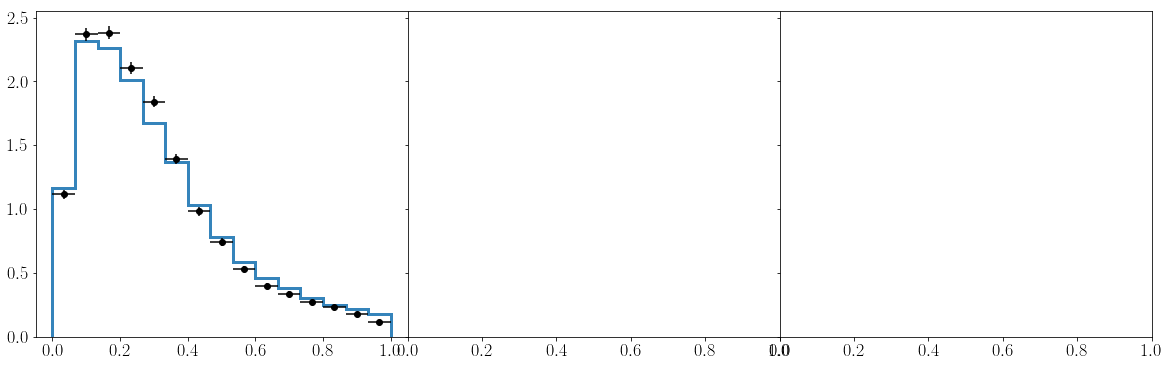

In [85]:


from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

maxrange = 1.0
nbins = 15
for counter,edges in enumerate([(15,20), (20,30),(30,50)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=3)
    printSummary(df_cut)
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=3)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='best')

    #axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
     #                 r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqtnormed_ept.png', bbox_inches='tight')
plt.savefig('H1_Leptonqtnormed_ept.pdf', bbox_inches='tight')

In [ ]:
df_cut = df_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,2.5),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)
plt.yscale('log')

In [ ]:
df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>2.6')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='$dphi>2.6 rad$')

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='$dphi>3.0 rad$')

df_cut = mc_jet.query('e_pt>15 and e_pt<20')
plt.hist(df_cut['genjet_qtnormept'],bins=20,range = (0,1.5),alpha=0.3, normed=True, label='all')
plt.title('pt electron 15-20 GeV')
plt.legend(loc='best',fontsize=20)
plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)

#plt.yscale('log')